In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# 1. Analyze missing values
missing_percent = df.isnull().sum()/len(df)*100
print("Missing Value Analysis:")
print(missing_percent)

# 2. Identify data types
print("\nData Types:")
print(df.dtypes)

# TASK 1: Calculate number of launches per site
launch_site_counts = df['LaunchSite'].value_counts()
print("\nLaunch Site Counts:")
print(launch_site_counts)

# TASK 2: Calculate orbit distribution
orbit_counts = df['Orbit'].value_counts()
print("\nOrbit Distribution:")
print(orbit_counts)

# TASK 3: Analyze mission outcomes
landing_outcomes = df['Outcome'].value_counts()
print("\nMission Outcomes:")
print(landing_outcomes)

# Identify bad outcomes
bad_outcomes = {
    'False ASDS', 'None ASDS', 'None None', 
    'False Ocean', 'False RTLS'
}

# TASK 4: Create landing classification
df['Class'] = df['Outcome'].apply(
    lambda x: 0 if x in bad_outcomes else 1
)

# Calculate success rate
success_rate = df['Class'].mean() * 100
print(f"\nSuccess Rate: {success_rate:.2f}%")

# Show results
print("\nFirst 10 Rows with Classification:")
print(df[['FlightNumber', 'LaunchSite', 'Orbit', 'Outcome', 'Class']].head(10))

# Export results
df.to_csv("dataset_part_2.csv", index=False)
print("\nResults exported to dataset_part_2.csv")

Missing Value Analysis:
FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Data Types:
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Launch Site Cou

/var/folders/54/8p1pzd9s4nz5651vsnlrbfv40000gn/T/ipykernel_48767/1272660002.py:128: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/54/8p1pzd9s4nz5651vsnlrbfv40000gn/T/ipykernel_48767/1272660002.py:129: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig('spacex_data_wrangling_flowchart.png', dpi=300, bbox_inches='tight')
/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


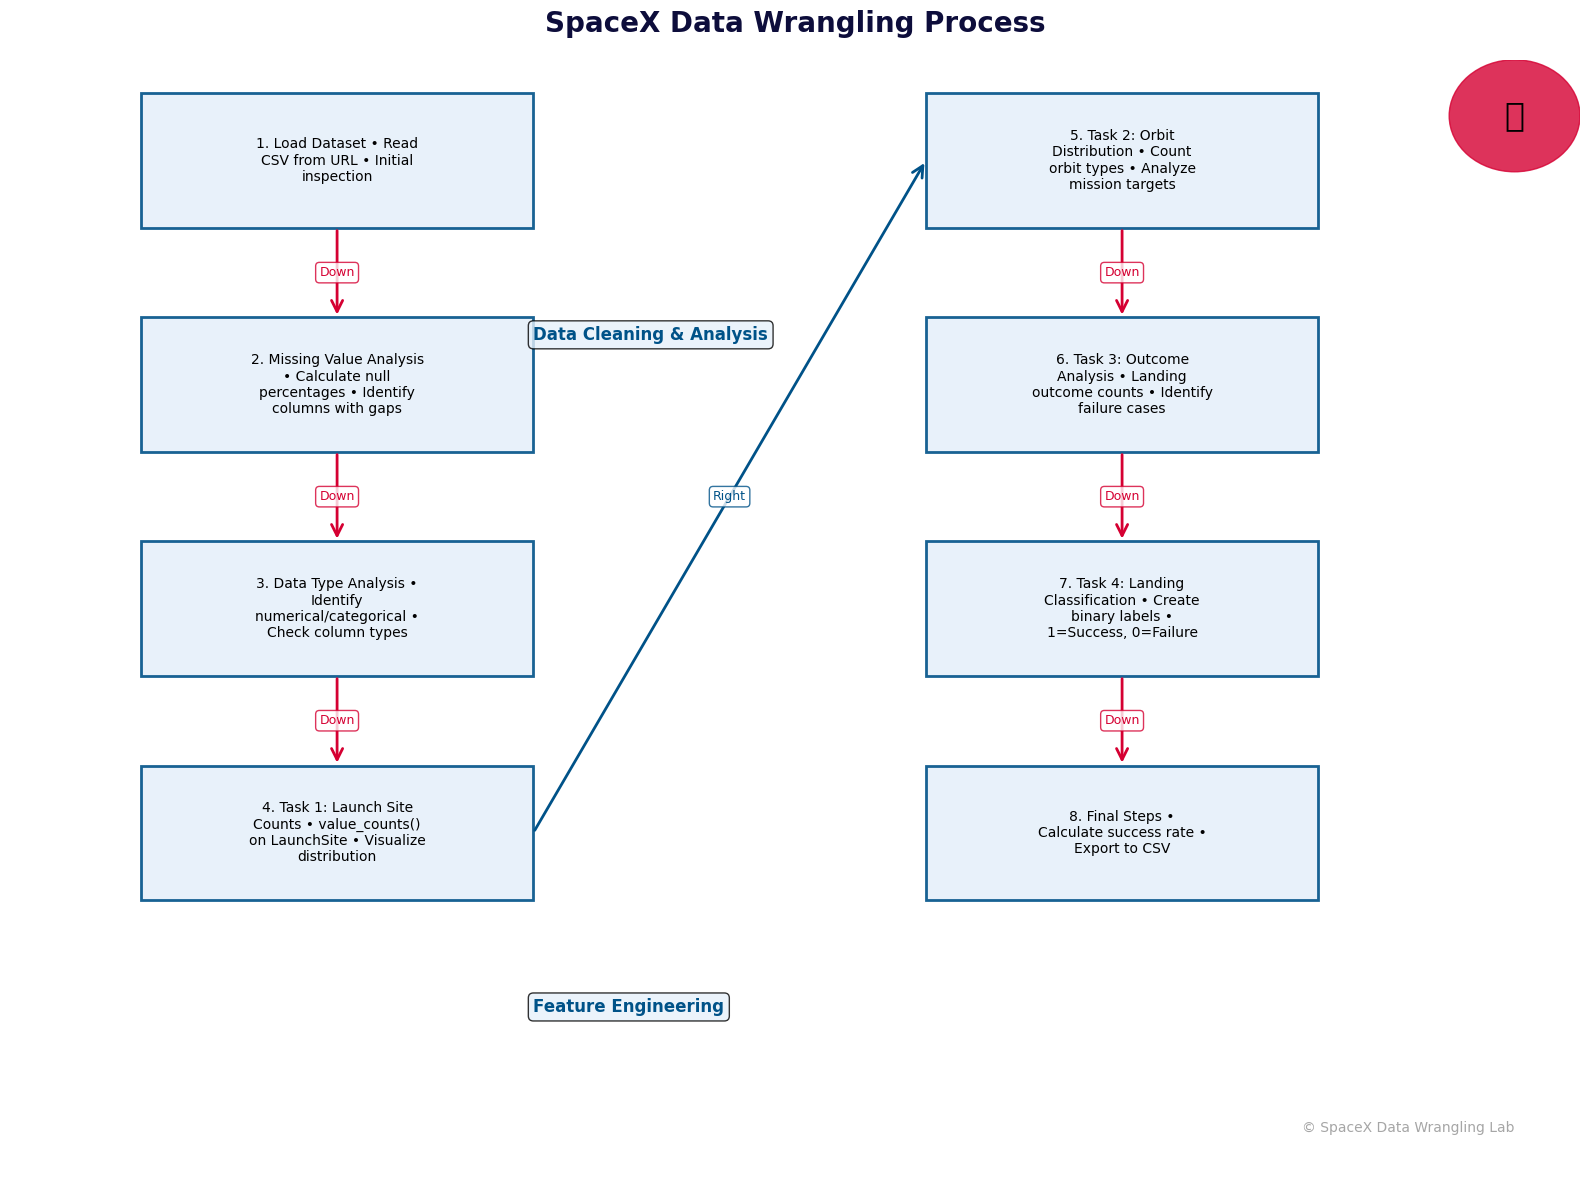

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import matplotlib.patheffects as path_effects
import textwrap

# Create flowchart
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
plt.title('SpaceX Data Wrangling Process', 
          fontsize=20, weight='bold', pad=20, 
          color='#0d0d3b',  # SpaceX dark blue
          fontfamily='sans-serif')

# Colors
SPACEX_BLUE = '#005288'
SPACEX_RED = '#d50032'
LIGHT_BLUE = '#e6f0fa'
BOX_WIDTH = 3.0
BOX_HEIGHT = 1.2

# Helper function to create boxes
def create_box(x, y, width, height, label, color=SPACEX_BLUE):
    box = Rectangle((x, y), width, height, 
                    fill=True, facecolor=LIGHT_BLUE, 
                    edgecolor=color, lw=2, 
                    alpha=0.9, linestyle='-')
    ax.add_patch(box)
    
    # Add text with wrapping
    wrapped = textwrap.fill(label, width=25)
    ax.text(x + width/2, y + height/2, wrapped, 
            ha='center', va='center', 
            fontsize=10, fontfamily='sans-serif')
    return box

# Define positions for each step
positions = [
    (1.0, 8.5, "1. Load Dataset\n• Read CSV from URL\n• Initial inspection"),
    (1.0, 6.5, "2. Missing Value Analysis\n• Calculate null percentages\n• Identify columns with gaps"),
    (1.0, 4.5, "3. Data Type Analysis\n• Identify numerical/categorical\n• Check column types"),
    (1.0, 2.5, "4. Task 1: Launch Site Counts\n• value_counts() on LaunchSite\n• Visualize distribution"),
    (7.0, 8.5, "5. Task 2: Orbit Distribution\n• Count orbit types\n• Analyze mission targets"),
    (7.0, 6.5, "6. Task 3: Outcome Analysis\n• Landing outcome counts\n• Identify failure cases"),
    (7.0, 4.5, "7. Task 4: Landing Classification\n• Create binary labels\n• 1=Success, 0=Failure"),
    (7.0, 2.5, "8. Final Steps\n• Calculate success rate\n• Export to CSV")
]

# Create all boxes
boxes = {}
for i, (x, y, label) in enumerate(positions):
    box = create_box(x, y, BOX_WIDTH, BOX_HEIGHT, label)
    boxes[i+1] = box

# Add arrows
arrows = [
    (1, 2, "Down", SPACEX_RED),
    (2, 3, "Down", SPACEX_RED),
    (3, 4, "Down", SPACEX_RED),
    (4, 5, "Right", SPACEX_BLUE),
    (5, 6, "Down", SPACEX_RED),
    (6, 7, "Down", SPACEX_RED),
    (7, 8, "Down", SPACEX_RED)
]

# Arrow drawing function
def draw_arrow(start, end, direction, color):
    start_box = boxes[start]
    end_box = boxes[end]
    
    # Calculate positions based on direction
    if direction == "Down":
        start_point = (start_box.get_x() + BOX_WIDTH/2, start_box.get_y())
        end_point = (end_box.get_x() + BOX_WIDTH/2, end_box.get_y() + BOX_HEIGHT)
    elif direction == "Right":
        start_point = (start_box.get_x() + BOX_WIDTH, start_box.get_y() + BOX_HEIGHT/2)
        end_point = (end_box.get_x(), end_box.get_y() + BOX_HEIGHT/2)
    else:  # Up
        start_point = (start_box.get_x() + BOX_WIDTH/2, start_box.get_y() + BOX_HEIGHT)
        end_point = (end_box.get_x() + BOX_WIDTH/2, end_box.get_y())
    
    arrow = FancyArrowPatch(start_point, end_point,
                            arrowstyle='->', 
                            mutation_scale=20, 
                            color=color,
                            linewidth=2)
    ax.add_patch(arrow)
    
    # Add arrow label
    label_x = (start_point[0] + end_point[0]) / 2
    label_y = (start_point[1] + end_point[1]) / 2
    ax.text(label_x, label_y, direction, 
            ha='center', va='center', 
            backgroundcolor='white',
            fontsize=9, color=color,
            bbox=dict(boxstyle="round,pad=0.3", 
                      facecolor='white', 
                      edgecolor=color, 
                      alpha=0.8))

# Draw all arrows
for arrow in arrows:
    draw_arrow(*arrow)

# Add SpaceX Falcon 9 icon
falcon_icon = plt.Circle((11.5, 9.5), 0.5, color=SPACEX_RED, alpha=0.8)
ax.add_patch(falcon_icon)
ax.text(11.5, 9.5, "🚀", 
        fontsize=24, ha='center', va='center')

# Add data flow labels
ax.text(4.0, 7.5, "Data Cleaning & Analysis", 
        fontsize=12, color=SPACEX_BLUE, weight='bold',
        bbox=dict(boxstyle="round", facecolor=LIGHT_BLUE, alpha=0.8))

ax.text(4.0, 1.5, "Feature Engineering", 
        fontsize=12, color=SPACEX_BLUE, weight='bold',
        bbox=dict(boxstyle="round", facecolor=LIGHT_BLUE, alpha=0.8))

# Add watermark
fig.text(0.95, 0.05, "© SpaceX Data Wrangling Lab", 
         ha='right', va='bottom', 
         fontsize=10, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig('spacex_data_wrangling_flowchart.png', dpi=300, bbox_inches='tight')
plt.show()